In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/.DS_Store
input/vgsales.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from wordcloud import WordCloud,STOPWORDS

import warnings            
warnings.filterwarnings("ignore") 
plt.style.use('ggplot') # style of plots. ggplot is one of the most us

In [3]:
games_data = pd.read_csv("input/vgsales.csv")
games_data.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
# let's see null values in dataset if their then drop that values
games_data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
games_data = games_data.dropna()

In [6]:
# no. of video games releases every year

games_data['Year'].value_counts().iplot(kind='bar',
                                       xTitle='Year',
                                       yTitle='Frequency of games',
                                       title='No. of video games releases per year',
                                       color = 'rgba(40, 124, 140, 0.5)')

In [7]:
# globally sales done every year

games_data.groupby('Year')['Global_Sales'].sum().iplot(kind='bar', 
                                                       xTitle='Year',
                                                       yTitle='Sales in Millions',
                                                       title='Year wise sales data',
                                                       color = 'rgba(125, 224, 255, 0.5)')

In [8]:
# no. of games produce in each genre


games_data['Genre'].value_counts().iplot(kind='bar',
                                       xTitle='Genre',
                                       yTitle='Frequency of games',
                                       title='No. of video games releases per each genre',
                                       color = 'rgba(150, 200, 80, 0.5)')

In [9]:
# top 10 games sales comparision

trace = go.Bar(x=games_data.Name[:10],
               y=games_data.Global_Sales[:10],
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
               line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(title='Top 10 games sales wise', xaxis=dict(title='Year',zeroline= False,
                                                        gridcolor='rgb(183,183,183)',
                                                        showline=True),
                                                    yaxis=dict(title='Sales',zeroline= False,
                                                        gridcolor='rgb(183,183,183)',
                                                        showline=True),
                  font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)')
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [10]:
# top 10 publisher of games

games_data['Publisher'].value_counts()[:10].iplot(kind='bar',
                                       xTitle='Publisher',
                                       yTitle='Frequency of games',
                                       title='Top 10 Publisher of video games',
                                       color = 'rgba(150, 10, 80, 0.5)')

In [11]:
# top 10 publisher of games

games_data['Platform'].value_counts()[:10].iplot(kind='bar',
                                       xTitle='Plateform',
                                       yTitle='Frequency of games',
                                       title='Top 10 Plateform of video games',
                                       color = 'rgba(50, 120, 80, 0.5)')

In [12]:
stop_words=set(STOPWORDS)
publisher_string = " ".join(games_data['Publisher'])
name_string = " ".join(games_data['Name'])

In [13]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

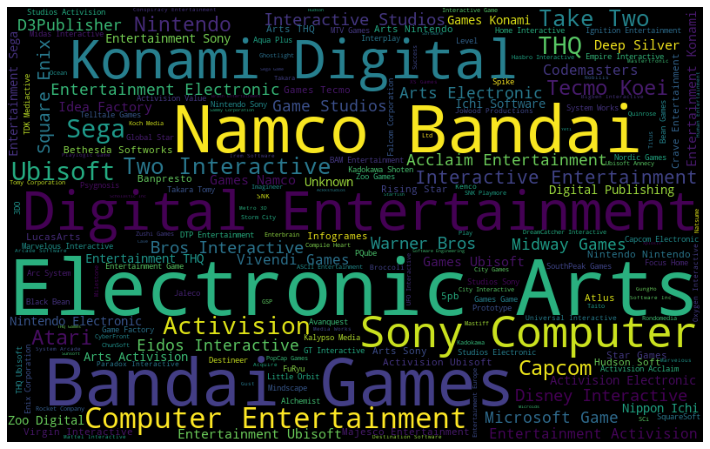

In [14]:
wordcloud(publisher_string)

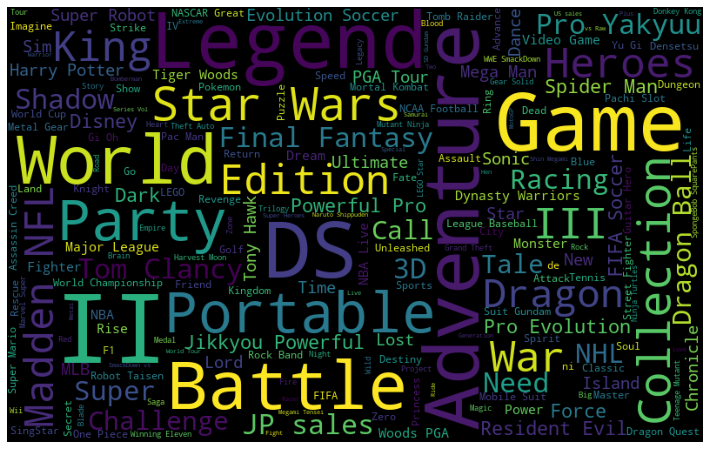

In [15]:
wordcloud(name_string)

In [16]:
labels = games_data['Platform']
pie = games_data['Platform'].value_counts()

# figure
fig = {
  "data": [
    {
      "values": pie,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "hoverinfo":"label+percent+name",
      "hole": .3,                                   
      "type": "pie"
    },],
  "layout": {
        "title":"Game rate of diffrent platform",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Game rate",
                "x": 0.135,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

In [17]:
Other_Sales = games_data.groupby('Genre')['Other_Sales'].sum()
NA_Sales = games_data.groupby('Genre')['NA_Sales'].sum()
EU_Sales =games_data.groupby('Genre')['EU_Sales'].sum()
JP_Sales =games_data.groupby('Genre')['JP_Sales'].sum()
Global_Sales = games_data.groupby('Genre')['Global_Sales'].sum()

In [18]:
# comparision of types of games selled in north america, europe, japan and other

trace1 = go.Bar(x=games_data.Name[:5],
                y=games_data.NA_Sales[:5],
                name='North America Sales',
                marker = dict(color = 'rgba(125, 215, 180, 0.5)',line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(x=games_data.Name[:5],
                y=games_data.EU_Sales[:5],
                name='Europe Sales',
                marker = dict(color = 'rgba(115, 155, 214, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))

trace3 = go.Bar(x=games_data.Name[:5],
                y=games_data.JP_Sales[:5],
                name='Japan Sales',
                marker = dict(color = 'rgba(150, 60, 80, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))

trace4 = go.Bar(x=games_data.Name[:5],
                y=games_data.Other_Sales[:5],
                name='Other Sales',
                marker = dict(color = 'rgba(254, 155, 28, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(x=games_data.Name[:5],
                y=games_data.Global_Sales[:5],
                name='Global Sales',
                marker = dict(color = 'rgba(255, 155, 128, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(barmode='group', title='Top 5 Games sales comparision in diffrent region (in millions)', 
                   xaxis=dict(title='Name of Games',zeroline= True, gridcolor='rgb(183,183,183)',showline=True),
                   yaxis=dict(title='Sales in different regions',zeroline= True, gridcolor='rgb(183,183,183)', showline=True),
                  font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'))

data = [trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(
    autosize=False,
    width=800,
    height=700,)
iplot(fig)

In [19]:
# comparision of types of games selled in north america, europe, japan and other

trace1 = go.Bar(x=NA_Sales.index,
                y=NA_Sales,
                name='North America Sales',
                marker = dict(color = 'rgba(125, 215, 180, 0.5)',line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Bar(x=EU_Sales.index,
                y=EU_Sales,
                name='Europe Sales',
                marker = dict(color = 'rgba(115, 155, 214, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))

trace3 = go.Bar(x=JP_Sales.index,
                y=JP_Sales,
                name='Japan Sales',
                marker = dict(color = 'rgba(150, 60, 80, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))

trace4 = go.Bar(x=Other_Sales.index,
                y=Other_Sales,
                name='Other Sales',
                marker = dict(color = 'rgba(254, 155, 28, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))

trace5 = go.Bar(x=Global_Sales.index,
                y=Global_Sales,
                name='Global Sales',
                marker = dict(color = 'rgba(255, 155, 128, 0.5)', line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(barmode='group', title='Genre wise sales comparision in diffrent region (in millions)', 
                   xaxis=dict(title='Genre',zeroline= True, gridcolor='rgb(183,183,183)',showline=True),
                   yaxis=dict(title='Sales',zeroline= True, gridcolor='rgb(183,183,183)', showline=True),
                  font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)'))

data = [trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(
    autosize=False,
    width=800,
    height=700,)
iplot(fig)

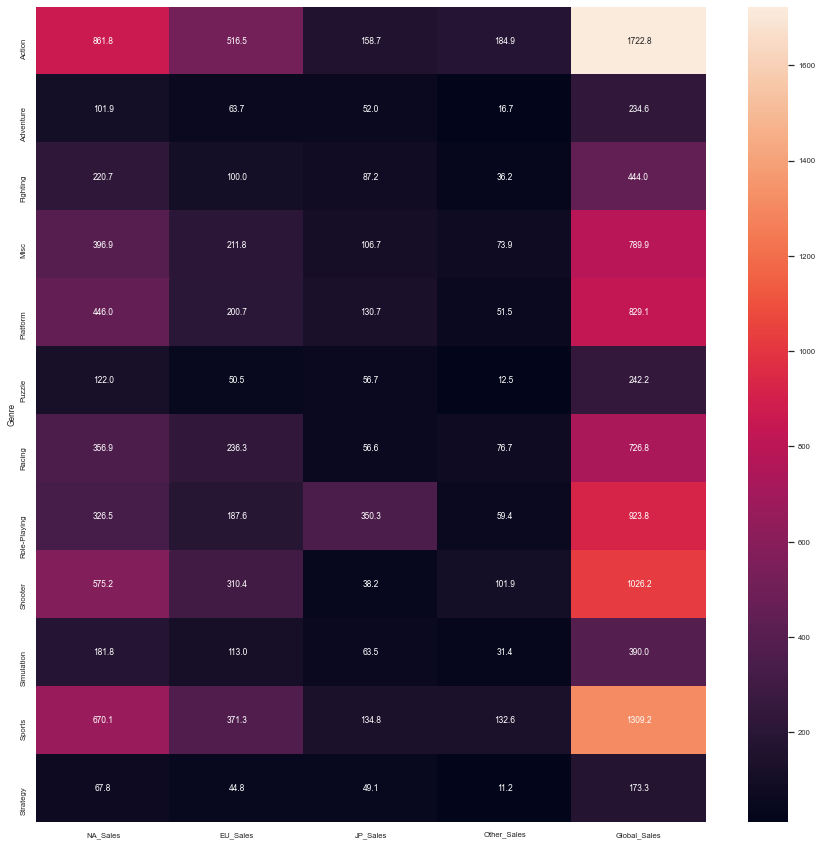

In [20]:
# heatmap genre

GenreGroup = games_data.groupby(['Genre']).sum().loc[:, 'NA_Sales':'Global_Sales']
plt.figure(figsize=(15, 15))
sns.set(font_scale=0.7)
sns.heatmap(GenreGroup, annot=True, fmt = '.1f')